In [11]:
import hashlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#setup for my seed
username = "sumit_Kumbhar"
seed_hash = hashlib.sha256(username.encode()).hexdigest()

seed = int(seed_hash, 16) % (2**32)
print(f"Username: {username}")
print(f"Seed: {seed}")

rng = np.random.default_rng(seed)


Username: sumit_Kumbhar
Seed: 4198605732


In [23]:
class StudentDataset:

    gender_category = ["Female", "Male", "Others"]
    gender_prob = [0.65, 0.33, 0.02]

    major_cat = ["B.Tech", "MS", "PhD"]
    major_prob = [0.70, 0.20, 0.10]

    prog_cat = ["CSE", "ECE", "CHD", "CND"]
    prog_prob_conditional = {
        "B.Tech": [0.4, 0.4, 0.1, 0.1],   
        "MS":     [0.3, 0.3, 0.2, 0.2],   
        "PhD":    [0.25, 0.25, 0.25, 0.25]
    }

    gpa_params = {
        "B.Tech": {"loc": 7.0, "scale": 1.0}, 
        "MS":     {"loc": 8.0, "scale": 0.7}, 
        "PhD":    {"loc": 8.3, "scale": 0.5}  
    }

    def __init__ (self, num_students: int, seed: int):
        self.num_students = num_students
        self.seed = seed
        self.rng = np.random.default_rng(self.seed)
        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        generated_genders = self.rng.choice(
            a=self.gender_category,
            size=self.num_students,
            p=self.gender_prob
        )
        return generated_genders.tolist();

    def generate_major(self) -> list[str]:
        generated_major = self.rng.choice(
            a=self.major_cat,
            size=self.num_students,
            p=self.major_prob
        )
        return generated_major.tolist();

    def generate_program(self, majors: list[str]) -> list[str]:
        programs = []
        for major in majors:
            prob = self.prog_prob_conditional.get(major)
            if(prob):
                program = self.rng.choice(
                    a=self.prog_cat,
                    size=1,  
                    p=prob
                )[0]
                programs.append(program)
        return programs
    
    def generate_gpa(self, majors: list[str]) -> list[float]:
        gpas = []
        default_params = {"loc": 7.5, "scale": 1.0}
        for major in majors:
            params = self.gpa_params.get(major, default_params)
            gpa = self.rng.normal(loc=params["loc"], scale=params["scale"])
            gpas.append(gpa)

        gpas_array = np.array(gpas)
        clipped_gpas = np.clip(gpas_array, 4.0, 10.0)
        rounded_gpas = np.round(clipped_gpas, 2)
        return rounded_gpas.tolist()
    
    def assemble_dataframe(self) -> pd.DataFrame:
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        data = {
            "gpa": gpas,
            "gender": genders,
            "major": majors,
            "program": programs
        }

        return pd.DataFrame(data)
    
    def get_full_dataframe(self) -> pd.DataFrame:
        return self.df
    
    def plot_gender_count(self) -> None:
        sns.set_style("whitegrid")
        plt.Figure(figsize=(10,6))

        count_plot = sns.countplot(data=self.df, x="gender")
        count_plot.set_title("Gender count")
        count_plot.set_xlabel("Gender")
        count_plot.set_ylabel("Count")

        plt.show()

    def plot_major_count(self) -> None:
        sns.set_style("whitegrid")
        plt.Figure(figsize=(10,6))

        count_plot = sns.countplot(data=self.df, x="major")
        count_plot.set_title("major count")
        count_plot.set_xlabel("Major")
        count_plot.set_ylabel("Count")

        plt.show()

    def plot_gpa_distribution(self) -> None:
        sns.set_style("whitegrid")
        plt.Figure(figsize=(10,6))

        count_plot = sns.histplot(data=self.df, x="gpa", bins=20)
        count_plot.set_title("gpa count")
        count_plot.set_xlabel("gpa")
        count_plot.set_ylabel("Count")

        plt.show()

    
genrator = StudentDataset(num_students=5, seed = seed)
data = genrator.get_full_dataframe()
print(data);
    


    gpa  gender   major program
0  7.63  Female      MS     CHD
1  8.07    Male     PhD     CHD
2  7.11    Male  B.Tech     CSE
3  8.11    Male  B.Tech     ECE
4  6.76  Female  B.Tech     CHD


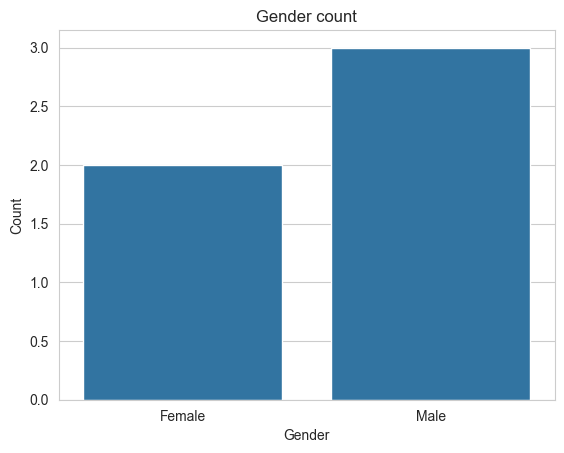

In [16]:
genrator.plot_gender_distribution()

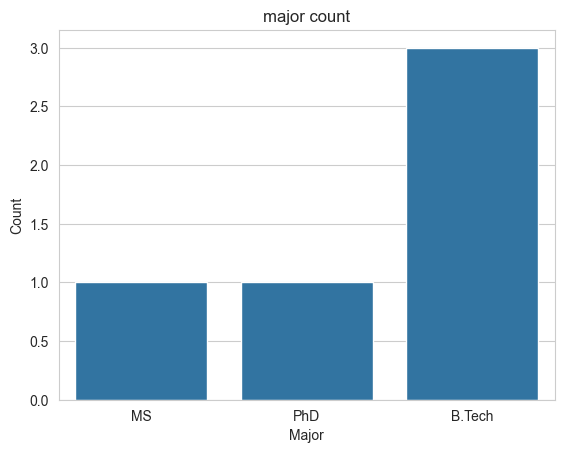

In [21]:
genrator.plot_major_count();

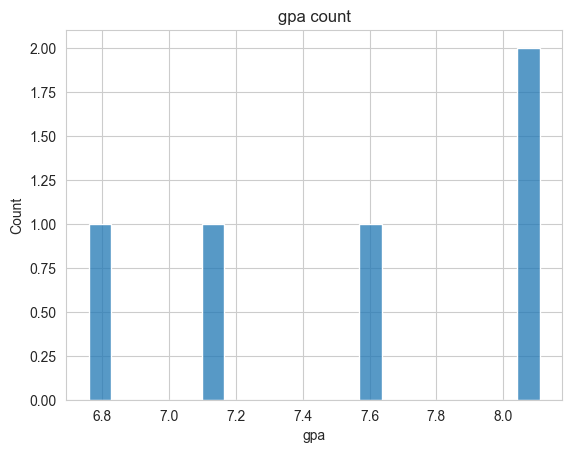

In [24]:
genrator.plot_gpa_distribution()